# Week2 授業前課題4 （任意課題）ダーツ投げ問題

>ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。
>注意していただきたいのは、ダーツのまとを選ぶ行為とダーツの矢が刺さる場所 をプログラミングでどう表現するかです。
>そしてダーツ投げの実装を通して、確率分布やディクショナリについても学んでいきます。

株価とサイコロの例では、全ての事象に対して均等に起こりえるので、各事象が同じ確率で起こりえます。数式で表現すると以下のようになります。


$\mathrm{確率} = \frac{1}{\mathrm{起こりえる事象の数}}$

全て同じ確率で出るのでグラフの高さは同じになります。このように全ての事象に対して確率が同じ（一様）である分布を**一様分布**と言います。

一様分布は全ての事象が等しい確率で起きていますが、身の回りの出来事に目を向けると均等な確率では発生しない事象の方が多いと思います。


株価の変動、地震、日本人の年齢などは当然ですが、全ての事象において均等には発生していないです（地震はほとんどが震度3以下、株価も大暴落は数年に一度、日本人の年齢分布は高齢化が進んでいるので均等でないことはわかると思います）。


今挙げた3つの例からもわかるように、**世の中全ての事象はその事象特有の規模と頻度（人口ならば年齢と人数）**の関係があります。そしてその規模と頻度の関係を可視化したものを一般的に **確率分布** と言います（上に描画されている一様分布も確率分布の一つです）。


そして地震や株価のようにデータ（事象）が離散的な場合の確率分布を **離散確率分布** 、データ（事象）が連続的な場合の確率分布を **連続確率分布**　と言います。

## ダーツ投げのシミュレーションの作成  
>実装する上での前提条件を以下に示します。  
>* 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。  
>* ある番号のまとに狙ったダーツは、他のまとには行かないとします。  
>
>実装するフローは以下になります。  
>1. ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）【問題1】  
>2. サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）【問題2】   
>3. ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）【問題2】  
>4. 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）【問題3】  
>5. 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）【問題4】

## 【問題1】ダーツのまとを選ぶ  
>ダーツのまとを選ぶためにサイコロを実装しましょう。  
>  
>《ヒント》  
>  
>「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [1]:
import numpy as np

def roll_dice():
    """
    ６面のサイコロの目を出す関数
    
    Parameteres
    --------------
    none
    
    Returns
    --------------
    a_roll: int
        サイコロの目
    """
    # サイコロのすべての面をリストに入れる
    # DICE_ROLL = [1, 2, 3, 4, 5, 6]
    DICE_ROLL = np.arange(1, 6+1)
    
    # サイコロの目のリストからランダムに一つ取り出す
    a_roll = np.random.choice(DICE_ROLL)
    
    return a_roll

print("サイコロの目は： {}".format(roll_dice()))

サイコロの目は： 6


## 【問題2】ダーツを投げて、刺さった場所を記録する  
>ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布の**x方向の「中心」は問題1で出たサイコロの番号**、**「標準偏差」は0.1**としてください。 刺さった場所（座標）は、配列で保持するようにしてください。  
>  
>《ヒント》  
>
>ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。  
>また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [2]:
def get_darts_hits(dice_roll: int):
    """
    入力されたサイコロの目によって選ばれた番号の的を狙って投げた時の
    ダーツが当たる場所（x, y）を確率分布から出力する関数。
    平均=（サイコロの目,0)、標準偏差=0.1の２次元の乱数をrandom.normalによって
    
    Parameteres
    --------------
    dice_roll: int
        サイコロの目
    
    Returns
    --------------
    xy_n: ndarray
        入力されたサイコロの目に対応する的にダーツを投げた時の当たる場所（座標）
        を格納したndarray
    """
    # x軸用の正規分布配列（サイコロの目に合わせて移動する）
    x = np.random.normal(
                        loc = 0 + dice_roll,    # 平均
                        scale = 0.1)               # 標準偏差

    # y軸用の正規分布配列
    y = np.random.normal(
                        loc = 0,            # 平均
                        scale = 0.1)    # 標準偏
    xy_n = np.array([x, y])
    
    return xy_n


def get_darts_hit_by_multi(dice_roll):
    """
    入力されたサイコロの目によって選ばれた番号の的を狙って投げた時の
    ダーツが当たる場所（x, y）を確率分布から出力する関数。
    平均=（サイコロの目,0)、標準偏差=0.1の２次元の乱数を
    random.multivariate_normalによって取得
    
    Parameteres
    --------------
    dice_roll: int
        サイコロの目
    
    Returns
    --------------
    xy_m: ndarray
        入力されたサイコロの目に対応する的にダーツを投げた時の当たる場所（座標）
        を格納したndarray
    """
    # 多次元正規分布配列（multivariate_normalを使用）
    xy_m = np.random.multivariate_normal(
                        mean = [0 + dice_roll, 0],           # 平均
                        cov = [[0.01, 0], [0, 0.01]])      # 共分散行列
    
    return xy_m


# roll_dice関数を用いてサイコロの目をランダムに取得
dice = roll_dice()

# get_darts_hits関数、get_darts_hit_by_multi関数を用いて
# ダーツがささった場所（座標）を確率分布からndarrayで取得
hit_locations = get_darts_hits(dice)
hit_locations_by_m = get_darts_hit_by_multi(dice)

# 答え
print("サイコロの目{}のとき、random.normal によって得られた確率分布に基づく\n \
ダーツが当たる座標は：\n{}".format(dice, hit_locations))
print()
print("サイコロの目{}のとき、random.multivariate_normal によって得られた確率分布に基づく\n \
ダーツが当たる座標は：\n{}".format(dice, hit_locations_by_m))


サイコロの目3のとき、random.normal によって得られた確率分布に基づく
 ダーツが当たる座標は：
[3.0534787  0.09514761]

サイコロの目3のとき、random.multivariate_normal によって得られた確率分布に基づく
 ダーツが当たる座標は：
[2.79551852 0.068291  ]


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する  
>ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。  
>  
>《ヒント》  
>  
>「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [3]:
# サイコロの目に対応する座標を入れるリストを入れたリストを用意
dice_roll_results = [[],[],[],[],[],[]]

# ダーツ投げの繰り返し回数
roll_times = 1000

# 
for i in range(roll_times):
    # サイコロを振って出目を格納
    dice_num = roll_dice()
    # サイコロの目に対応するリストにダーツ座標を足していく
    dice_roll_results[dice_num - 1].append(get_darts_hits(dice_num))

# ディクショナリに格納する
dice_roll_results_dict = {1:dice_roll_results[0], 2:dice_roll_results[1],
                                          3:dice_roll_results[2], 4:dice_roll_results[3],
                                          5:dice_roll_results[4], 6:dice_roll_results[5]}  


## 【問題4】ダーツのまとと刺さった位置を描画する  
>問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

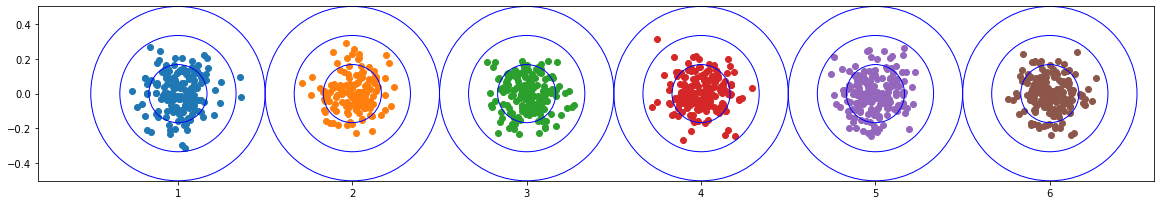

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

# 描画領域とsubplotを作成
fig = plt.figure()
ax = fig.add_subplot()

# x軸、y軸の表示サイズを設定
ax.set_xlim(0.2, 6.6)
ax.set_ylim(-0.5, 0.5)

for i in range(6):
    # 円を３つ（大、中、小）描画
    circle1 = plt.Circle((1+i, 0), 0.5, edgecolor='blue', fill=False)
    circle2 = plt.Circle((1+i, 0), 0.5 * 2/3, edgecolor='blue', fill=False)
    circle3 = plt.Circle((1+i, 0), 0.5 * 1/3, edgecolor='blue', fill=False)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    # サイコロの目に対応するダーツ座標をディクショナリから取得
    dice_roll_results_ndarray = np.array(dice_roll_results_dict.get(1+i))
    # ダーツ座標の描画
    plt.scatter(dice_roll_results_ndarray[:,0], dice_roll_results_ndarray[:,1])

#　アスペクト比がおかしくならないようにする
ax.set_aspect(1.0)
# サークルパッチの表示サイズが小さいので調整
fig.set_size_inches(20, 20)

plt.show()

## 【問題5】関数化  
>ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、  
>問題1~問題4で作成したコードを関数化しましょう。  
>  
>《ヒント》  
>  
>ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。



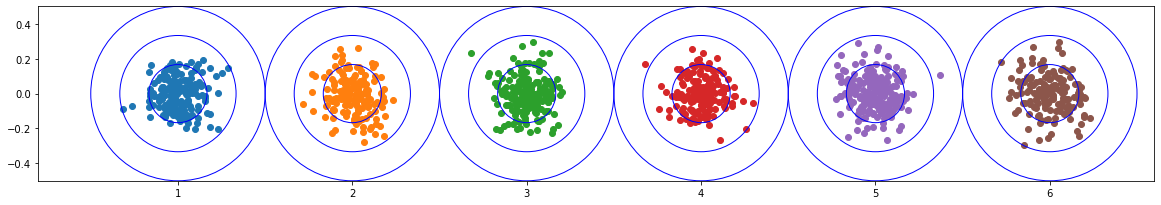

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def roll_dice(dice_surface: int):
    """
    ６面のサイコロの目を出す関数
    
    Parameteres
    --------------
    dice_surface: int
        サイコロの目の数
    
    Returns
    --------------
    a_roll: int
        出たサイコロの目
    """
    # サイコロのすべての面をリストに入れる
    DICE_ROLL = np.arange(1, dice_surface + 1)
    
    # サイコロの目のリストからランダムに一つ取り出す
    a_roll = np.random.choice(DICE_ROLL)
    
    return a_roll



def get_darts_hits(dice_roll: int):
    """
    入力されたサイコロの目によって選ばれた番号の的を狙って投げた時の
    ダーツが当たる場所（x, y）を確率分布から出力する関数。
    平均=（サイコロの目,0)、標準偏差=0.1の２次元の乱数をrandom.normalによって
    
    Parameteres
    --------------
    dice_roll: int
        サイコロの目
    
    Returns
    --------------
    xy_n: ndarray
        入力されたサイコロの目に対応する的にダーツを投げた時の当たる場所（座標）
        を格納したndarray
    """
    # x軸用の正規分布配列
    x = np.random.normal(
                        loc = 0 + dice_roll,    # 平均
                        scale = 0.1)               # 標準偏差

    # y軸用の正規分布配列
    y = np.random.normal(
                        loc = 0,           # 平均
                        scale = 0.1)    # 標準偏
    xy_n = np.array([x, y])
    
    return xy_n


def get_darts_hit_by_multi(dice_roll):
    """
    入力されたサイコロの目によって選ばれた番号の的を狙って投げた時の
    ダーツが当たる場所（x, y）を確率分布から出力する関数。
    平均=（サイコロの目,0)、標準偏差=0.1の２次元の乱数を
    random.multivariate_normalによって取得
    
    Parameteres
    --------------
    dice_roll: int
        サイコロの目
    
    Returns
    --------------
    xy_m: ndarray
        入力されたサイコロの目に対応する的にダーツを投げた時の当たる場所（座標）
        を格納したndarray
    """
    # 多次元正規分布配列（multivariate_normalを使用）
    xy_m = np.random.multivariate_normal(
                        mean = [0 + dice_roll, 0],           # 平均
                        cov = [[0.01, 0], [0, 0.01]])      # 共分散行列
    
    return xy_m


def problem_throw_darts(roll_times: int, target_count: int):
    """
    ダーツ投げ問題の回答を出す関数
    ダーツを投げる回数とダーツの的の数を渡すと確率分布（正規分布）に基づいて
    的ごとにダーツがどこに当たるのか描画する関数
    
    Parameteres
    --------------
    roll_times: int
        ダーツを投げる回数
    target_count: int
        ダーツの的の数
        
    Returns
    --------------
    none
    """
    # roll_dice関数を用いてサイコロの目をランダムに取得
    dice = roll_dice(target_count)

    # get_darts_hits関数、get_darts_hit_by_multi関数を用いて
    # ダーツがさった場所（座標）を確率分布からndarrayで取得
    hit_locations = get_darts_hits(dice)
    hit_locations_by_m = get_darts_hit_by_multi(dice)


    # サイコロの目に対応する座標を入れるリストを入れたリストを用意
    # dice_roll_results = [[],[],[],[],[],[]]
    dice_roll_results = []
    for _ in range(target_count):
        dice_roll_results.append([])

    # ダーツ座標配列の作成
    for i in range(roll_times):
        # サイコロを振って出目を格納
        dice_num = roll_dice(target_count)
        # サイコロの目に対応するリストにダーツ座標を足していく
        dice_roll_results[dice_num-1].append(get_darts_hits(dice_num))

    # ディクショナリに格納する
    dice_roll_results_dict = {1:dice_roll_results[0], 2:dice_roll_results[1],
                                              3:dice_roll_results[2], 4:dice_roll_results[3],
                                              5:dice_roll_results[4], 6:dice_roll_results[5]}  

    %matplotlib inline

    # 描画領域とsubplotを作成
    fig = plt.figure()
    ax = fig.add_subplot()

    # x軸、y軸の表示サイズを設定
    ax.set_xlim(0.2, 6.6)
    ax.set_ylim(-0.5, 0.5)

    for i in range(6):
        # 円を３つ（大、中、小）描画
        circle1 = plt.Circle((1+i, 0), 0.5, edgecolor='blue', fill=False)
        circle2 = plt.Circle((1+i, 0), 0.5 * 2/3, edgecolor='blue', fill=False)
        circle3 = plt.Circle((1+i, 0), 0.5 * 1/3, edgecolor='blue', fill=False)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.add_patch(circle3)
        # サイコロの目に対応するダーツ座標をディクショナリから取得
        dice_roll_results_ndarray = np.array(dice_roll_results_dict.get(1+i))
        # ダーツ座標の描画
        plt.scatter(dice_roll_results_ndarray[:,0], dice_roll_results_ndarray[:,1])

    #　アスペクト比がおかしくならないようにする
    ax.set_aspect(1.0)
    # 表示サイズが小さいので調整
    fig.set_size_inches(20, 20)

    plt.show()

    
    
# ダーツ投げの繰り返し回数
roll_times = 1000

# ダーツの的の数
target_count = 6    

# 関数を用いてダーツが当たる場所を描画する
problem_throw_darts(roll_times, target_count)